In [1]:
import os
import pandas as pd
import statsmodels.api as sm
import json
import pprint
import glob
import datetime
import random
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

warnings.filterwarnings('ignore')

# Importing Data:

In [3]:
# 1975 to 1981:

acc_sect_1 = pd.read_csv('acc_sect_1.csv')
acc_sect_1.head()

,YEAR,ST_CASE,PERSONS,HOUR,SCH_BUS,FATALS
0,1975,10001,3,22,0.0,1
1,1975,10002,2,4,0.0,1
2,1975,10003,1,4,0.0,1
3,1975,10004,3,14,0.0,1
4,1975,10005,1,20,0.0,1


In [4]:
# 1982 to 1990:

acc_sect_2 = pd.read_csv('acc_sect_2.csv')
acc_sect_2.head()

,YEAR,ST_CASE,PERSONS,HOUR,ROAD_NAME,MILE_MARKER,SCH_BUS,FATALS
0,1982,10001,2,8,65,2131.0,0,2
1,1982,10002,1,23,0409,0.0,0,1
2,1982,10003,1,12,0234,0.0,0,1
3,1982,10004,4,23,59,28128.0,0,2
4,1982,10005,2,10,0310,0.0,0,1


In [5]:
# 1991 to 2000:

acc_sect_3 = pd.read_csv('acc_sect_3.csv')
acc_sect_3.head()

,YEAR,ST_CASE,NUM_PEDS,PERSONS,HOUR,ROAD_NAME,MILE_MARKER,SCH_BUS,FATALS
0,1991,10001,0,2,11,I20,1723.0,0,1
1,1991,10002,0,6,7,SR13,25.0,0,2
2,1991,10003,0,1,23,5849,0.0,0,1
3,1991,10004,0,2,16,2208,0.0,0,1
4,1991,10005,0,2,15,69,1882.0,0,1


In [6]:
# 2001 to 2007:

acc_sect_4 = pd.read_csv('acc_sect_4.csv')
acc_sect_4.head()

,YEAR,ST_CASE,NUM_PEDS,PERSONS,HOUR,ROAD_NAME,MILE_MARKER,SCH_BUS,FATALS
0,2001,10001,0,1,20,1274,0.0,0,1
1,2001,10002,0,1,5,SR-204,75.0,0,1
2,2001,10003,0,2,22,SR-21,1230.0,0,1
3,2001,10004,0,2,17,I-65,1642.0,0,1
4,2001,10005,0,2,9,US-SR3,2993.0,0,1


In [7]:
# 2008 to 2014:

acc_sect_5 = pd.read_csv('acc_sect_5.csv')
acc_sect_5.head()

,YEAR,ST_CASE,NUM_PEDS,NUM_VEHC,PERSONS,HOUR,ROAD_NAME,MILE_MARKER,LATITUDE,LONGITUD,SCH_BUS,FATALS
0,2008,10001,1,1,3,17,SR-69,0.0,34.326947,-86.489567,0,1
1,2008,10002,0,2,2,12,I-20,1230.0,33.520883,-86.847739,0,1
2,2008,10003,0,1,1,2,1027,0.0,32.477511,-86.346628,0,1
3,2008,10004,0,1,2,10,8438,0.0,30.814786,-88.171917,0,1
4,2008,10005,2,1,3,21,US-SR6,0.0,32.326347,-86.320975,0,2


In [8]:
# 2015 to 2021:

acc_sect_6 = pd.read_csv('acc_sect_6.csv')
acc_sect_6.head()

,YEAR,STATENAME,ST_CASE,NUM_PEDS,NUM_VEHC,PERSONS,MONTHNAME,DAYNAME,DAY_WEEKNAME,HOUR,...,COLLISION_TYPE,TYP_INTNAME,REL_ROADNAME,WRK_ZONENAME,LGT_CONDNAME,WEATHERNAME,SCH_BUS,FATALS,COUNTYNAME,CITYNAME
0,2015,Alabama,10001,0,1,1,January,1,Thursday,2,...,Not a Collision with Motor Vehicle In-Transport,Not an Intersection,On Roadside,None,Dark - Not Lighted,Clear,0,1,NOT AVAILABLE,NOT AVAILABLE
1,2015,Alabama,10002,0,1,1,January,1,Thursday,22,...,Not a Collision with Motor Vehicle In-Transport,Not an Intersection,On Median,None,Dark - Not Lighted,Cloudy,0,1,NOT AVAILABLE,NOT AVAILABLE
2,2015,Alabama,10003,0,1,2,January,1,Thursday,1,...,Not a Collision with Motor Vehicle In-Transport,Not an Intersection,On Roadside,None,Dark - Not Lighted,Clear,0,1,NOT AVAILABLE,NOT AVAILABLE
3,2015,Alabama,10004,0,1,1,January,4,Sunday,0,...,Not a Collision with Motor Vehicle In-Transport,Not an Intersection,On Roadside,None,Dark - Not Lighted,Cloudy,0,1,NOT AVAILABLE,NOT AVAILABLE
4,2015,Alabama,10005,0,2,2,January,7,Wednesday,7,...,Angle,T-Intersection,On Roadway,None,Daylight,Clear,0,1,NOT AVAILABLE,NOT AVAILABLE


# Model 1 - Accidents from 1975 to 1981:

In [9]:
# Check to make sure all types inputted into the model are quantitative
acc_sect_1.dtypes

YEAR         int64
ST_CASE      int64
PERSONS      int64
HOUR         int64
SCH_BUS    float64
FATALS       int64
dtype: object

In [10]:
# Exclude 'FATALS' and 'ST_CASE' columns
X_1 = acc_sect_1.loc[:, ~acc_sect_1.columns.isin(['FATALS', 'ST_CASE'])]

y_1 = acc_sect_1.loc[:,'FATALS']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.25)


In [11]:
rf_mod_1 = RandomForestClassifier(n_estimators=100, random_state=42)

rf_mod_1.fit(X_train_1, y_train_1)

# Test Predictions
preds_mod_1 = rf_mod_1.predict(X_test_1)

# Accuracy
acc_mod_1 = accuracy_score(y_test_1, preds_mod_1)
print("Accuracy:", acc_mod_1)


Accuracy: 0.8961541025128308


#### Feature Importance Plot:

In [12]:
impts = rf_mod_1.feature_importances_

feature_names = X_train_1.columns

idxs = np.argsort(impts)[::-1]

for i in idxs:
    print(f"{feature_names[i]}: {impts[i]}")


PERSONS: 0.7471620099272362
HOUR: 0.17032959183028054
YEAR: 0.07702801827975148
SCH_BUS: 0.00548037996273174


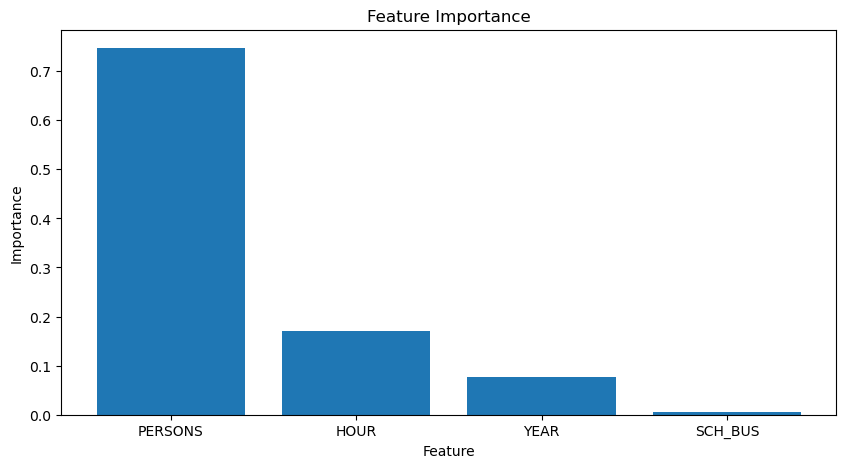

In [13]:
impts = rf_mod_1.feature_importances_

idxs = np.argsort(impts)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(len(impts)), impts[idxs], align="center")
plt.xticks(range(len(impts)), [feature_names[i] for i in idxs]) 
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


#### Confusion Matrix:

In [14]:
# Create confusion matrix
conf_mat_1 = confusion_matrix(y_test_1, preds_mod_1)

# Empty sens and spec lists
sens_list = []
spec_list = []

# Find sensitivity and specificity for each class, where "positive" means equal to 
# the class and "negative" means not equal to the class
for i in range(conf_mat_1.shape[0]):
    TP = conf_mat_1[i, i]
    FN = np.sum(conf_mat_1[i, :]) - TP
    FP = np.sum(conf_mat_1[:, i]) - TP
    TN = np.sum(conf_mat_1) - (TP + FN + FP)
    
    sens = TP / (TP + FN)
    spec = TN / (TN + FP)
    
    sens_list.append(sens)
    spec_list.append(spec)

# Print out classes' sens and spec values
for i, (sens, spec) in enumerate(zip(sens_list, spec_list)):
    print(f"Class {i}: Sensitivity = {sens}, Specificity = {spec}")


Class 0: Sensitivity = 0.0, Specificity = 1.0
Class 1: Sensitivity = 0.9983803381972718, Specificity = 0.0085525463262926
Class 2: Sensitivity = 0.005430311008721408, Specificity = 0.9989120659142998
Class 3: Sensitivity = 0.001713796058269066, Specificity = 0.9994041815621276
Class 4: Sensitivity = 0.0030864197530864196, Specificity = 0.9998795035546452
Class 5: Sensitivity = 0.0, Specificity = 0.9999599620974523
Class 6: Sensitivity = 0.0, Specificity = 1.0
Class 7: Sensitivity = 0.0, Specificity = 0.999986666844442
Class 8: Sensitivity = 0.0, Specificity = 0.9999733365329494
Class 9: Sensitivity = nan, Specificity = 0.9999866693328001
Class 10: Sensitivity = 0.0, Specificity = 0.9999600074652731
Class 11: Sensitivity = 0.0, Specificity = 1.0
Class 12: Sensitivity = nan, Specificity = 0.9999866693328001


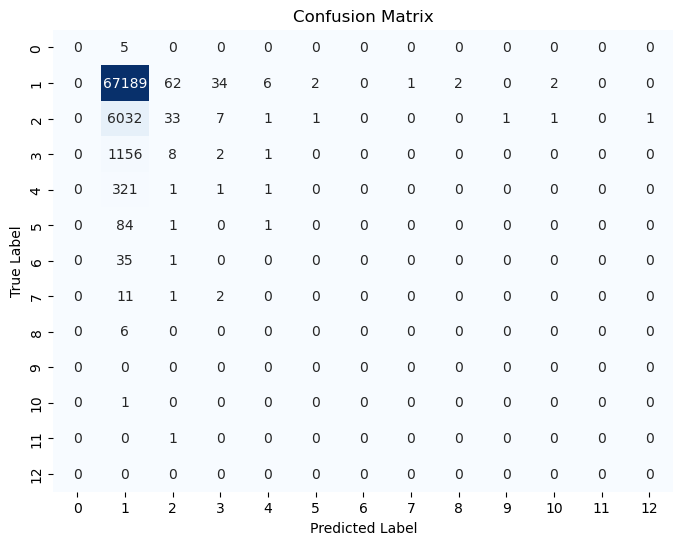

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Model 2 - Accidents from 1982 to 1990:

In [16]:
acc_sect_2.dtypes

YEAR             int64
ST_CASE          int64
PERSONS          int64
HOUR             int64
ROAD_NAME       object
MILE_MARKER    float64
SCH_BUS          int64
FATALS           int64
dtype: object

In [17]:
X_2 = acc_sect_2.drop(columns=['FATALS', 'ROAD_NAME', 'ST_CASE'])  
y_2 = acc_sect_2['FATALS']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.25)




In [18]:
rf_mod_2 = RandomForestClassifier(n_estimators=100, random_state=42)

rf_mod_2.fit(X_train_2, y_train_2)

preds_mod_2 = rf_mod_2.predict(X_test_2)

acc_mod_2 = accuracy_score(y_test_2, preds_mod_2)
print("Accuracy:", acc_mod_2)


Accuracy: 0.8854933929975743


#### Feature Importance Plot:

In [19]:
impts = rf_mod_2.feature_importances_

feature_names = X_train_2.columns

idxs = np.argsort(impts)[::-1]

for i in idxs:
    print(f"{feature_names[i]}: {impts[i]}")


MILE_MARKER: 0.6068189290024284
HOUR: 0.1563618093802338
PERSONS: 0.15388222160008927
YEAR: 0.0810136387911815
SCH_BUS: 0.0019234012260670524


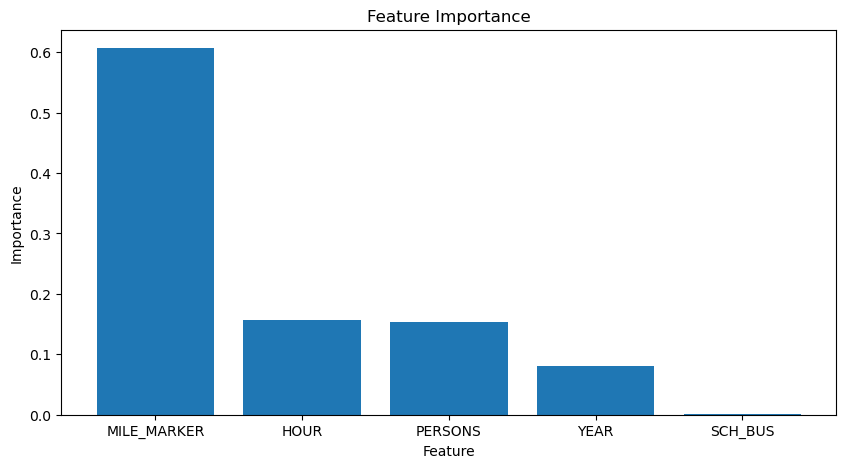

In [20]:
impts = rf_mod_2.feature_importances_

idxs = np.argsort(impts)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(len(impts)), impts[idxs], align="center")
plt.xticks(range(len(impts)), [feature_names[i] for i in idxs])  # Use feature names instead of idxs
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


#### Confusion Matrix:

In [21]:
conf_mat_2 = confusion_matrix(y_test_2, preds_mod_2)

sens_list = []
spec_list = []

for i in range(conf_mat_2.shape[0]):
    TP = conf_mat_2[i, i]
    FN = np.sum(conf_mat_2[i, :]) - TP
    FP = np.sum(conf_mat_2[:, i]) - TP
    TN = np.sum(conf_mat_2) - (TP + FN + FP)
    
    sens = TP / (TP + FN)
    spec = TN / (TN + FP)
    
    sens_list.append(sens)
    spec_list.append(spec)

for i, (sens, spec) in enumerate(zip(sens_list, spec_list)):
    print(f"Class {i}: Sensitivity = {sens}, Specificity = {spec}")


Class 0: Sensitivity = 0.0, Specificity = 1.0
Class 1: Sensitivity = 0.972781050624557, Specificity = 0.06426461901949203
Class 2: Sensitivity = 0.048284999263948185, Specificity = 0.976164810156905
Class 3: Sensitivity = 0.019008264462809916, Specificity = 0.9962839468750351
Class 4: Sensitivity = 0.009174311926605505, Specificity = 0.9993441237938547
Class 5: Sensitivity = 0.0, Specificity = 0.9996895615056267
Class 6: Sensitivity = 0.0, Specificity = 0.9999446038622187
Class 7: Sensitivity = 0.0, Specificity = 0.9999778447359092
Class 8: Sensitivity = 0.0, Specificity = 0.9999778462083786
Class 9: Sensitivity = 0.0, Specificity = 1.0
Class 10: Sensitivity = 0.0, Specificity = 1.0
Class 11: Sensitivity = 0.0, Specificity = 1.0
Class 12: Sensitivity = 0.0, Specificity = 1.0


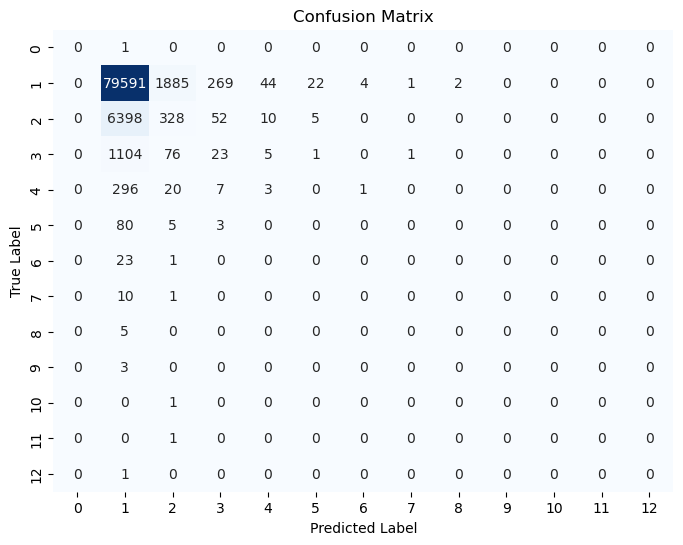

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_2, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Model 3 - Accidents from 1991 to 2000:

In [23]:
acc_sect_3.dtypes

YEAR             int64
ST_CASE          int64
NUM_PEDS         int64
PERSONS          int64
HOUR             int64
ROAD_NAME       object
MILE_MARKER    float64
SCH_BUS          int64
FATALS           int64
dtype: object

In [24]:
X_3 = acc_sect_3.drop(columns=['FATALS', 'ROAD_NAME', 'ST_CASE'])  
y_3 = acc_sect_3['FATALS']

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.25)


In [25]:
rf_mod_3 = RandomForestClassifier(n_estimators=100, random_state=42)

rf_mod_3.fit(X_train_3, y_train_3)

preds_mod_3 = rf_mod_3.predict(X_test_3)

acc_mod_3 = accuracy_score(y_test_3, preds_mod_3)
print("Accuracy:", acc_mod_3)


Accuracy: 0.8757953816200225


#### Feature Importance Plot:

In [26]:
impts = rf_mod_3.feature_importances_

feature_names = X_train_3.columns

idxs = np.argsort(impts)[::-1]

for i in idxs:
    print(f"{feature_names[i]}: {impts[i]}")


MILE_MARKER: 0.601372265994255
HOUR: 0.150728985255956
PERSONS: 0.13660502623930418
YEAR: 0.08382246315865731
NUM_PEDS: 0.02630811753611465
SCH_BUS: 0.0011631418157129153


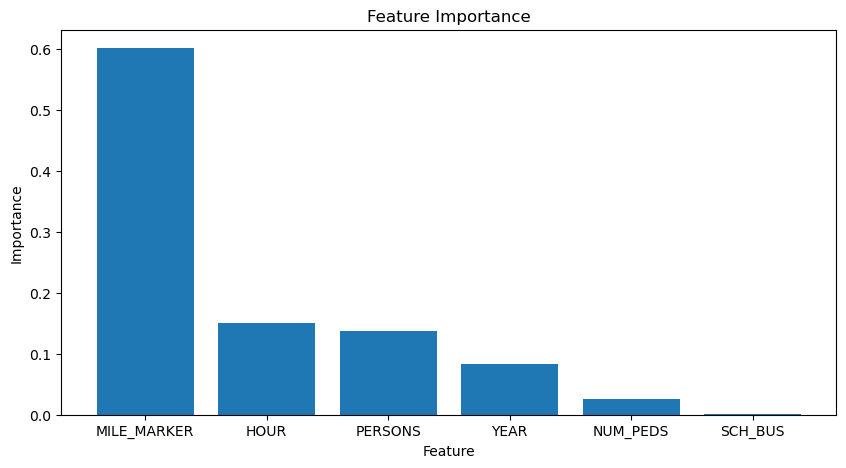

In [27]:
impts = rf_mod_3.feature_importances_

idxs = np.argsort(impts)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(len(impts)), impts[idxs], align="center")
plt.xticks(range(len(impts)), [feature_names[i] for i in idxs]) 
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


#### Confusion Matrix:

In [28]:
conf_mat_3 = confusion_matrix(y_test_3, preds_mod_3)

sens_list = []
spec_list = []

for i in range(conf_mat_3.shape[0]):
    TP = conf_mat_3[i, i]
    FN = np.sum(conf_mat_3[i, :]) - TP
    FP = np.sum(conf_mat_3[:, i]) - TP
    TN = np.sum(conf_mat_3) - (TP + FN + FP)
    
    sens = TP / (TP + FN)
    spec = TN / (TN + FP)
    
    sens_list.append(sens)
    spec_list.append(spec)

for i, (sens, spec) in enumerate(zip(sens_list, spec_list)):
    print(f"Class {i}: Sensitivity = {sens}, Specificity = {spec}")


Class 0: Sensitivity = 0.9623619698318377, Specificity = 0.08871975462910371
Class 1: Sensitivity = 0.06795160382667417, Specificity = 0.9681948390291056
Class 2: Sensitivity = 0.021172638436482084, Specificity = 0.9939366545767234
Class 3: Sensitivity = 0.009404388714733543, Specificity = 0.9988975965421643
Class 4: Sensitivity = 0.010101010101010102, Specificity = 0.9995971166619482
Class 5: Sensitivity = 0.0, Specificity = 0.9999020717270195
Class 6: Sensitivity = 0.0, Specificity = 0.9999782436063398
Class 7: Sensitivity = 0.0, Specificity = 1.0
Class 8: Sensitivity = 0.0, Specificity = 1.0


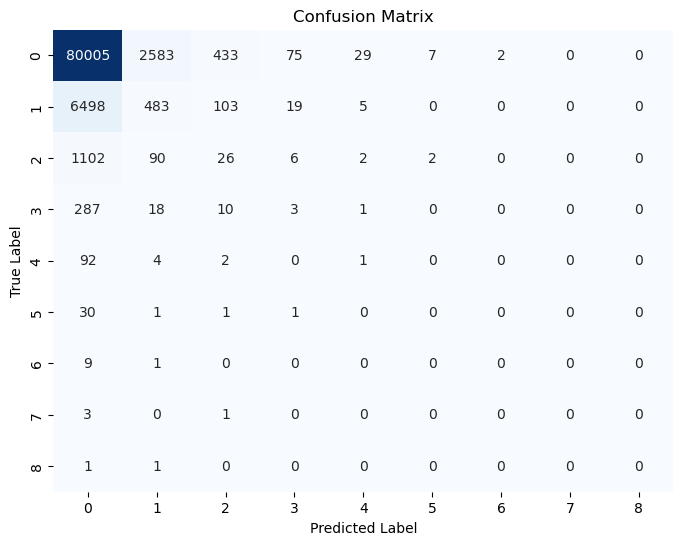

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_3, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Model 4 - Accidents from 2001 to 2007:

In [30]:
acc_sect_4.dtypes

YEAR             int64
ST_CASE          int64
NUM_PEDS         int64
PERSONS          int64
HOUR             int64
ROAD_NAME       object
MILE_MARKER    float64
SCH_BUS          int64
FATALS           int64
dtype: object

In [31]:
X_4 = acc_sect_4.drop(columns=['FATALS', 'ROAD_NAME', 'ST_CASE'])  
y_4 = acc_sect_4['FATALS']

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.25)


In [32]:
rf_mod_4 = RandomForestClassifier(n_estimators=100, random_state=42)

rf_mod_4.fit(X_train_4, y_train_4)

preds_mod_4 = rf_mod_4.predict(X_test_4)

acc_mod_4 = accuracy_score(y_test_4, preds_mod_4)
print("Accuracy:", acc_mod_4)


Accuracy: 0.8885976799249475


#### Feature Importance Plot:

In [33]:
impts = rf_mod_4.feature_importances_

feature_names = X_train_4.columns

idxs = np.argsort(impts)[::-1]

for i in idxs:
    print(f"{feature_names[i]}: {impts[i]}")


MILE_MARKER: 0.6084557995332392
HOUR: 0.15874463068782127
PERSONS: 0.14794004587427134
YEAR: 0.06017565874149949
NUM_PEDS: 0.023596206438058133
SCH_BUS: 0.0010876587251105352


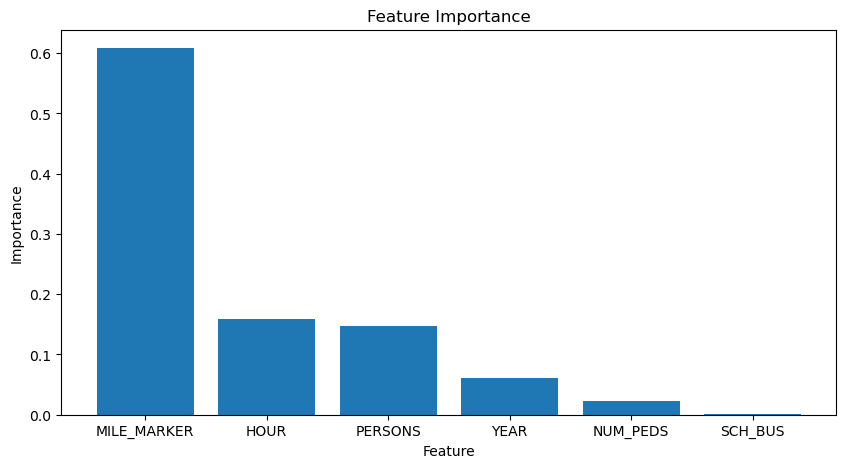

In [34]:
impts = rf_mod_4.feature_importances_

idxs = np.argsort(impts)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(len(impts)), impts[idxs], align="center")
plt.xticks(range(len(impts)), [feature_names[i] for i in idxs])  
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


#### Confusion Matrix:

In [35]:
conf_mat_4 = confusion_matrix(y_test_4, preds_mod_4)

sens_list = []
spec_list = []

for i in range(conf_mat_4.shape[0]):
    TP = conf_mat_4[i, i]
    FN = np.sum(conf_mat_4[i, :]) - TP
    FP = np.sum(conf_mat_4[:, i]) - TP
    TN = np.sum(conf_mat_4) - (TP + FN + FP)
    
    sens = TP / (TP + FN)
    spec = TN / (TN + FP)
    
    sens_list.append(sens)
    spec_list.append(spec)

for i, (sens, spec) in enumerate(zip(sens_list, spec_list)):
    print(f"Class {i}: Sensitivity = {sens}, Specificity = {spec}")


Class 0: Sensitivity = 0.9687448996246124, Specificity = 0.08193098759136495
Class 1: Sensitivity = 0.0616876418403136, Specificity = 0.9725227104933715
Class 2: Sensitivity = 0.022427440633245383, Specificity = 0.9958279990963175
Class 3: Sensitivity = 0.004975124378109453, Specificity = 0.9990291552156769
Class 4: Sensitivity = 0.0, Specificity = 0.999687052932761
Class 5: Sensitivity = 0.0, Specificity = 0.99997021016727
Class 6: Sensitivity = 0.0, Specificity = 0.9999553205748752
Class 7: Sensitivity = 0.0, Specificity = 1.0
Class 8: Sensitivity = 0.0, Specificity = 1.0
Class 9: Sensitivity = 0.0, Specificity = 1.0


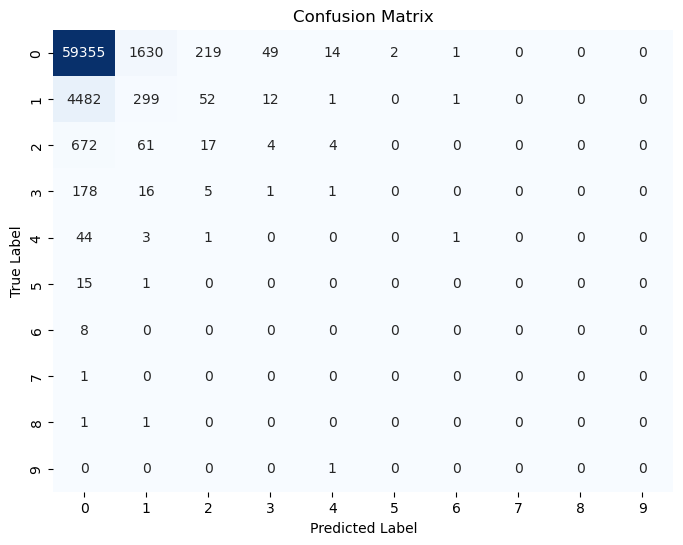

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_4, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Model 5 - Accidents from 2008 to 2014:

In [37]:
acc_sect_5.dtypes

YEAR             int64
ST_CASE          int64
NUM_PEDS         int64
NUM_VEHC         int64
PERSONS          int64
HOUR             int64
ROAD_NAME       object
MILE_MARKER    float64
LATITUDE       float64
LONGITUD       float64
SCH_BUS          int64
FATALS           int64
dtype: object

In [38]:
X_5 = acc_sect_5.drop(columns=['FATALS', 'ROAD_NAME', 'ST_CASE'])  
y_5 = acc_sect_5['FATALS']

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.25)


In [39]:
rf_mod_5 = RandomForestClassifier(n_estimators=100, random_state=42)

rf_mod_5.fit(X_train_5, y_train_5)

preds_mod_5 = rf_mod_5.predict(X_test_5)

acc_mod_5 = accuracy_score(y_test_5, preds_mod_5)
print("Accuracy:", acc_mod_5)


Accuracy: 0.9256781728139553


#### Feature Importance Plot:

In [40]:
impts = rf_mod_5.feature_importances_

feature_names = X_train_5.columns

idxs = np.argsort(impts)[::-1]

for i in idxs:
    print(f"{feature_names[i]}: {impts[i]}")


LATITUDE: 0.2566521277127557
LONGITUD: 0.25570198921464987
MILE_MARKER: 0.15110527760620332
HOUR: 0.12202306186972063
PERSONS: 0.09451856360596399
YEAR: 0.07327696167578113
NUM_VEHC: 0.026317698789024017
NUM_PEDS: 0.0189002005246983
SCH_BUS: 0.0015041190012029017


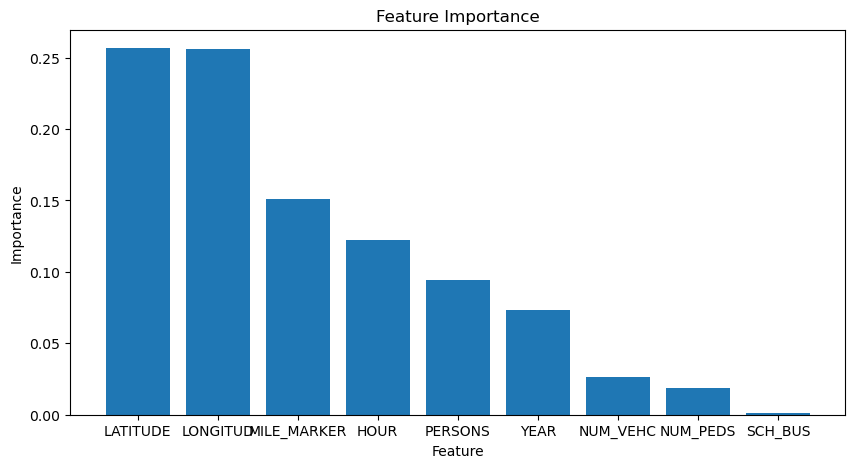

In [41]:
impts = rf_mod_5.feature_importances_

idxs = np.argsort(impts)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(len(impts)), impts[idxs], align="center")
plt.xticks(range(len(impts)), [feature_names[i] for i in idxs])  
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


#### Confusion Matrix:

In [42]:
conf_mat_5 = confusion_matrix(y_test_5, preds_mod_5)

sens_list = []
spec_list = []

for i in range(conf_mat_5.shape[0]):
    TP = conf_mat_5[i, i]
    FN = np.sum(conf_mat_5[i, :]) - TP
    FP = np.sum(conf_mat_5[:, i]) - TP
    TN = np.sum(conf_mat_5) - (TP + FN + FP)
    
    sens = TP / (TP + FN)
    spec = TN / (TN + FP)
    
    sens_list.append(sens)
    spec_list.append(spec)

for i, (sens, spec) in enumerate(zip(sens_list, spec_list)):
    print(f"Class {i}: Sensitivity = {sens}, Specificity = {spec}")


Class 0: Sensitivity = 0.9979867644713761, Specificity = 0.008611955420466059
Class 1: Sensitivity = 0.008117859290438966, Specificity = 0.9980901752313448
Class 2: Sensitivity = 0.0, Specificity = 0.99983228980322
Class 3: Sensitivity = 0.0, Specificity = 0.9999629622770793
Class 4: Sensitivity = 0.0, Specificity = 1.0
Class 5: Sensitivity = 0.0, Specificity = 1.0
Class 6: Sensitivity = 0.0, Specificity = 1.0
Class 7: Sensitivity = 0.0, Specificity = 1.0
Class 8: Sensitivity = 0.0, Specificity = 1.0
Class 9: Sensitivity = 0.0, Specificity = 1.0


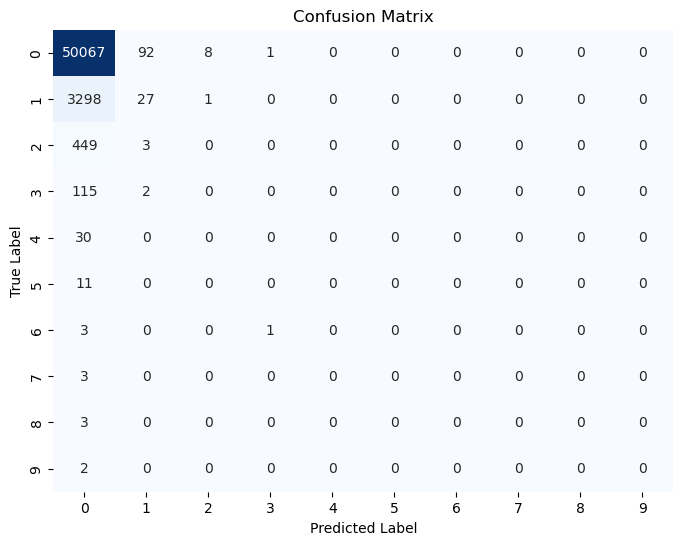

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_5, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Model 6 - Accidents from 2015 to 2021:

In [44]:
acc_sect_6.dtypes

YEAR                int64
STATENAME          object
ST_CASE             int64
NUM_PEDS            int64
NUM_VEHC            int64
PERSONS             int64
MONTHNAME          object
DAYNAME             int64
DAY_WEEKNAME       object
HOUR                int64
ROAD_NAME          object
ROUTENAME          object
RUR_URBNAME        object
FUNC_SYSNAME       object
RD_OWNERNAME       object
MILE_MARKER         int64
LATITUDE          float64
LONGITUD          float64
HARM_EVNAME        object
COLLISION_TYPE     object
TYP_INTNAME        object
REL_ROADNAME       object
WRK_ZONENAME       object
LGT_CONDNAME       object
WEATHERNAME        object
SCH_BUS             int64
FATALS              int64
COUNTYNAME         object
CITYNAME           object
dtype: object

In [45]:
for column in acc_sect_6.columns:
    unique_count = acc_sect_6[column].nunique()
    print(f"Number of unique values in column '{column}': {unique_count}")


Number of unique values in column 'YEAR': 7
Number of unique values in column 'STATENAME': 51
Number of unique values in column 'ST_CASE': 40822
Number of unique values in column 'NUM_PEDS': 14
Number of unique values in column 'NUM_VEHC': 29
Number of unique values in column 'PERSONS': 59
Number of unique values in column 'MONTHNAME': 12
Number of unique values in column 'DAYNAME': 31
Number of unique values in column 'DAY_WEEKNAME': 7
Number of unique values in column 'HOUR': 25
Number of unique values in column 'ROAD_NAME': 80591
Number of unique values in column 'ROUTENAME': 9
Number of unique values in column 'RUR_URBNAME': 5
Number of unique values in column 'FUNC_SYSNAME': 10
Number of unique values in column 'RD_OWNERNAME': 29
Number of unique values in column 'MILE_MARKER': 4121
Number of unique values in column 'LATITUDE': 236310
Number of unique values in column 'LONGITUD': 239716
Number of unique values in column 'HARM_EVNAME': 60
Number of unique values in column 'COLLISIO

Will make these variables with fewer levels into dummy variables:

MONTHNAME
DAY_WEEKNAME
ROUTENAME
RUR_URBNAME
FUNC_SYSNAME
COLLISION_TYPE
TYP_INTNAME
REL_ROADNAME
WRK_ZONENAME
LGT_CONDNAME
WEATHERNAME

Will exclude these variables because of too many levels:

STATENAME
ROAD_NAME
RD_OWNERNAME
HARM_EVNAME
COUNTYNAME
CITYNAME

In [46]:
columns_dummy = ['MONTHNAME', 'DAY_WEEKNAME', 'ROUTENAME', 'RUR_URBNAME', 
                    'FUNC_SYSNAME', 'COLLISION_TYPE', 'TYP_INTNAME', 'REL_ROADNAME', 
                    'WRK_ZONENAME', 'LGT_CONDNAME', 'WEATHERNAME']

dummy_df_6 = pd.get_dummies(acc_sect_6, columns=columns_dummy)

dummy_df_6 = dummy_df_6.drop(columns=['ST_CASE', 'STATENAME', 'ROAD_NAME', 'RD_OWNERNAME', 'HARM_EVNAME',
                              'COUNTYNAME', 'CITYNAME'])  

dummy_df_6.head()


,YEAR,NUM_PEDS,NUM_VEHC,PERSONS,DAYNAME,HOUR,MILE_MARKER,LATITUDE,LONGITUD,SCH_BUS,...,"WEATHERNAME_Fog, Smog, Smoke",WEATHERNAME_Freezing Rain or Drizzle,WEATHERNAME_Not Reported,WEATHERNAME_Other,WEATHERNAME_Rain,WEATHERNAME_Reported as Unknown,WEATHERNAME_Severe Crosswinds,WEATHERNAME_Sleet or Hail,WEATHERNAME_Snow,WEATHERNAME_Unknown
0,2015,0,1,1,1,2,1754,33.878653,-87.325328,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,0,1,1,1,22,3604,34.910442,-86.908708,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,0,1,2,1,1,1958,32.142006,-85.758456,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,0,1,1,4,0,566,31.439814,-85.510300,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,0,2,2,7,7,308,31.319331,-85.515100,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
dummy_df_6.shape

(244695, 122)

In [48]:
object_columns = dummy_df_6.select_dtypes(include=['object']).columns
dummy_df_6[object_columns].dtypes


Series([], dtype: object)

In [49]:
X_6 = dummy_df_6.drop(columns=['FATALS'])  

y_6 = acc_sect_6['FATALS']

X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, y_6, test_size=0.25)


In [50]:
rf_mod_6 = RandomForestClassifier(n_estimators=100, random_state=42)

rf_mod_6.fit(X_train_6, y_train_6)

preds_mod_6 = rf_mod_6.predict(X_test_6)

acc_mod_6 = accuracy_score(y_test_6, preds_mod_6)
print("Accuracy:", acc_mod_6)


Accuracy: 0.9285971164220094


#### Feature Importance Plot:

In [51]:
impts = rf_mod_6.feature_importances_

feature_names = X_train_6.columns

idxs = np.argsort(impts)[::-1]

for i in idxs:
    print(f"{feature_names[i]}: {impts[i]}")


PERSONS: 0.09128651487165419
LATITUDE: 0.08982761437402323
LONGITUD: 0.08962895694219591
DAYNAME: 0.07238367442163013
MILE_MARKER: 0.07006241349697585
HOUR: 0.06586865847484101
YEAR: 0.04465033648826012
NUM_VEHC: 0.021405581854615132
NUM_PEDS: 0.014513495004860323
WEATHERNAME_Clear: 0.013257642809165313
DAY_WEEKNAME_Saturday: 0.011786944915677137
DAY_WEEKNAME_Friday: 0.011630209984251799
COLLISION_TYPE_Front-to-Front: 0.011335206180351538
DAY_WEEKNAME_Sunday: 0.011212529578567299
ROUTENAME_State Highway: 0.010858263548663325
FUNC_SYSNAME_Minor Arterial: 0.010734051122477606
FUNC_SYSNAME_Principal Arterial - Other: 0.010425703092247636
WEATHERNAME_Cloudy: 0.010231850362758223
DAY_WEEKNAME_Monday: 0.009910616440099579
DAY_WEEKNAME_Thursday: 0.009731881207933012
DAY_WEEKNAME_Tuesday: 0.009596269061691792
LGT_CONDNAME_Dark - Not Lighted: 0.00948990616649214
DAY_WEEKNAME_Wednesday: 0.009396502561385306
LGT_CONDNAME_Daylight: 0.009340080380060506
MONTHNAME_July: 0.009294930238374622
MONTHNAM

#### Try to change the x-axis labels so they are vertical instead and smaller font

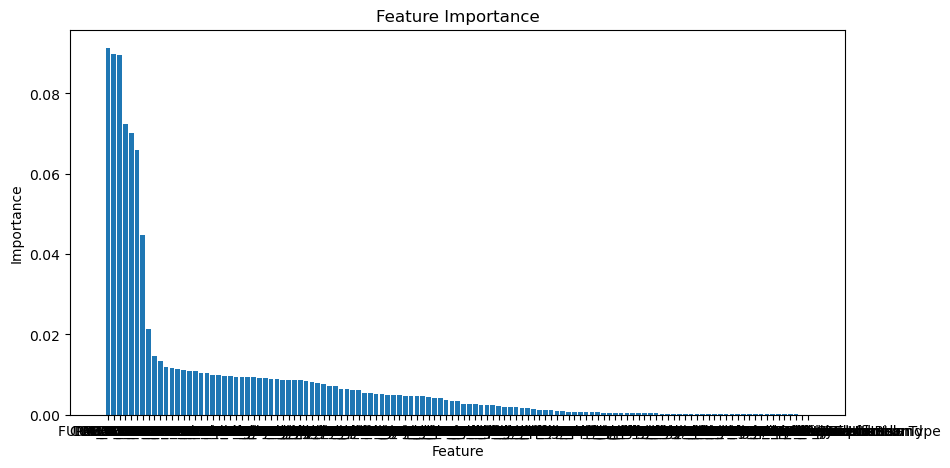

In [52]:
impts = rf_mod_6.feature_importances_

idxs = np.argsort(impts)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(len(impts)), impts[idxs], align="center")
plt.xticks(range(len(impts)), [feature_names[i] for i in idxs])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


#### Confusion Matrix:

In [53]:
conf_mat_6 = confusion_matrix(y_test_6, preds_mod_6)

sens_list = []
spec_list = []

for i in range(conf_mat_6.shape[0]):
    TP = conf_mat_6[i, i]
    FN = np.sum(conf_mat_6[i, :]) - TP
    FP = np.sum(conf_mat_6[:, i]) - TP
    TN = np.sum(conf_mat_6) - (TP + FN + FP)
    
    sens = TP / (TP + FN)
    spec = TN / (TN + FP)
    
    sens_list.append(sens)
    spec_list.append(spec)

for i, (sens, spec) in enumerate(zip(sens_list, spec_list)):
    print(f"Class {i}: Sensitivity = {sens}, Specificity = {spec}")


Class 0: Sensitivity = 0.9999471896069146, Specificity = 0.0009159606136936112
Class 1: Sensitivity = 0.0005496015388843089, Specificity = 0.9999130963761189
Class 2: Sensitivity = 0.0, Specificity = 1.0
Class 3: Sensitivity = 0.0, Specificity = 1.0
Class 4: Sensitivity = 0.0, Specificity = 1.0
Class 5: Sensitivity = 0.0, Specificity = 1.0
Class 6: Sensitivity = 0.0, Specificity = 1.0
Class 7: Sensitivity = 0.0, Specificity = 1.0
Class 8: Sensitivity = 0.0, Specificity = 1.0
Class 9: Sensitivity = 0.0, Specificity = 1.0
Class 10: Sensitivity = 0.0, Specificity = 1.0


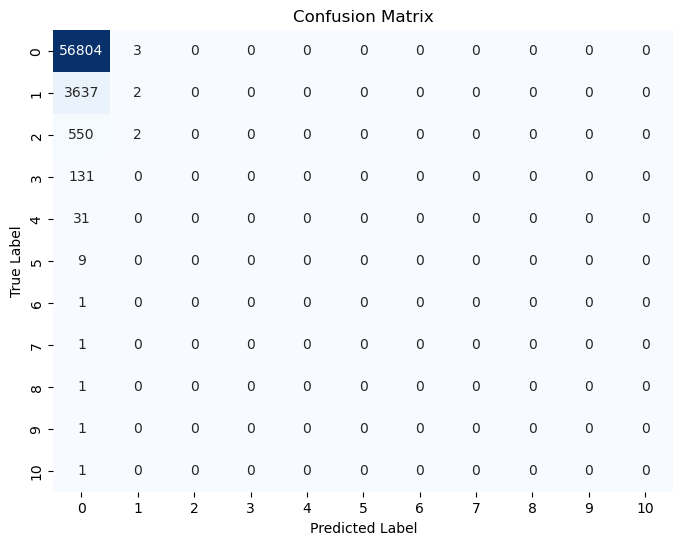

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_6, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
